In [43]:
import pandas as pd
import  numpy  as  np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import pywt
%matplotlib inline
import mpld3
mpld3.enable_notebook()
import sys
# !{sys.executable} -m pip install mpld3
# print("dhfhdbj")

Text(0.5,1,'Reoriented ay ')

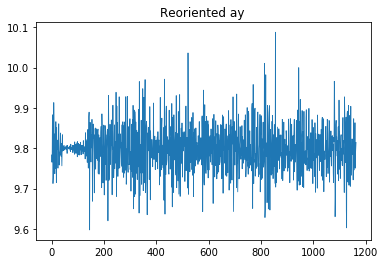

In [86]:
file_name_bump= "j7uduwila2.json"
dataBump = pd.read_json(file_name_bump)
# dataBump.head(5)
(dataBump.acceY.plot.line(lw=0.8))
plt.title('Reoriented ay ')

Text(0.5,1,'Wevelet ay ')

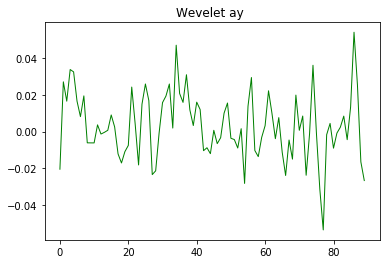

In [87]:
# cA, cD = pywt.dwt(dataBump.acceY, 'db2', 'symmetric')
cA4, cD4, cD3, cD2, cD1 = pywt.wavedec(dataBump.acceY, 'db10', mode='symmetric', level=4, axis=-1)
# (cA.plot.line(lw=0.8))
time = []
j = 0
for i in range(len(cD4)):
    time.append([j])
    j = j + 1
plt.plot(time, cD4, 'go-', linewidth=1, markersize=0)
plt.title('Wevelet ay ')
# pywt.wavelist()

Text(0.5,1,'Wevelet ay ')

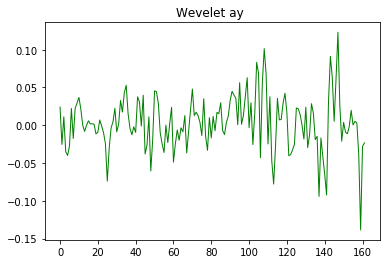

In [88]:
time = []
j = 0
for i in range(len(cD3)):
    time.append([j])
    j = j + 1
plt.plot(time, cD3, 'go-', linewidth=1, markersize=0)
plt.title('Wevelet ay ')

Text(0.5,1,'Wevelet ay ')

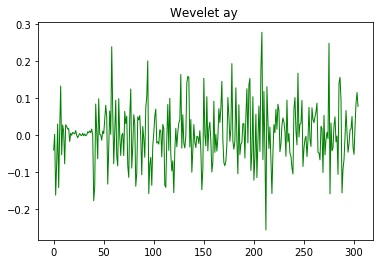

In [89]:
time = []
j = 0
for i in range(len(cD2)):
    time.append([j])
    j = j + 1
plt.plot(time, cD2, 'go-', linewidth=1, markersize=0)
plt.title('Wevelet ay ')

Text(0.5,1,'Wevelet ay ')

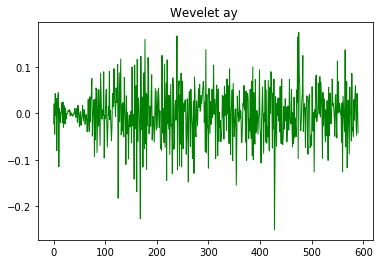

In [90]:
time = []
j = 0
for i in range(len(cD1)):
    time.append([j])
    j = j + 1
plt.plot(time, cD1, 'go-', linewidth=1, markersize=0)
plt.title('Wevelet ay ')

Text(0.5,1,'Wevelet ay')

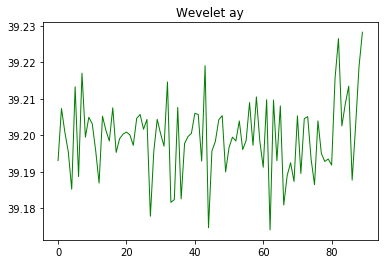

In [91]:
time = []
j = 0
for i in range(len(cA4)):
    time.append([j])
    j = j + 1
plt.plot(time, cA4, 'go-', linewidth=1, markersize=0)
plt.title('Wevelet ay')